In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model

In [8]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []
encoder = OneHotEncoder(sparse_output=False)

encoder.fit([[0], [1]])

for r, d, f in os.walk(r'C:\Users\ferna\OneDrive\Desktop\Brain_Tumor_Classification\brain_tumor_dataset\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]))

In [9]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\ferna\OneDrive\Desktop\Brain_Tumor_Classification\brain_tumor_dataset\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]))

In [10]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [11]:
print(f'Total number of images we have: {len(data)}')


Total number of images we have: 139


In [12]:
result = np.array(result)
result = result.reshape(139,2)


In [13]:

print(f"Shape of data: {data.shape}")
print(f"Shape of result: {result.shape}")

if data.shape[0] > result.shape[0]:
    data = data[:-1]  

elif data.shape[0] < result.shape[0]:
    result = result[:-1]  

x_train, x_test, y_train, y_test = train_test_split(
    data, result, test_size=0.2, shuffle=True, random_state=0
)


Shape of data: (139, 128, 128, 3)
Shape of result: (139, 2)


In [14]:
print(f'Number of images in training data: {len(x_train)}')


Number of images in training data: 111


In [15]:
print(f'Number of images in testing data: {len(x_test)}')


Number of images in testing data: 28


In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\ferna\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [17]:
y_train.shape


(111, 2)

In [18]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - loss: 23.3756 - val_loss: 48.7638
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - loss: 14.3205 - val_loss: 56.2724
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step - loss: 9.1684 - val_loss: 18.1523
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step - loss: 2.1004 - val_loss: 12.9121
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step - loss: 2.2459 - val_loss: 6.9116
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - loss: 0.8501 - val_loss: 8.8960
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step - loss: 1.1305 - val_loss: 7.3739
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - loss: 0.2169 - val_loss: 6.0212
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - loss: 0.5269 - val_loss: 6.1190
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - loss: 0.2649 - val_loss: 5.8567
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - loss: 0.8155 - val_loss: 5.7249
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step - loss: 0.4070 - 

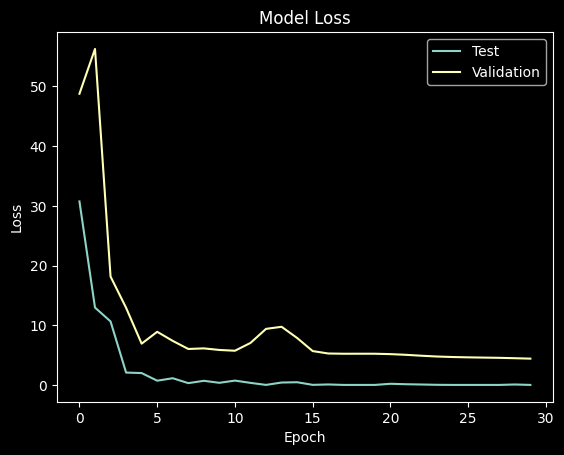

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [20]:
model.save('mod1.h5')


In [25]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a tumor'

100.0% Confidence Its not a tumor


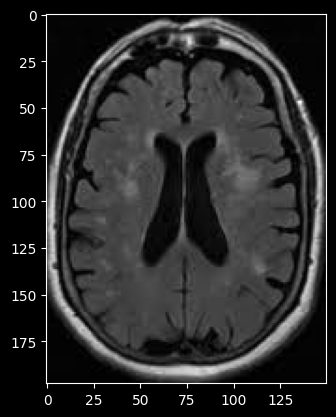

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ferna\OneDrive\Desktop\Brain_Tumor_Classification\brain_tumor_dataset\no\34 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.99982118606567% Confidence This Is A Its a Tumor


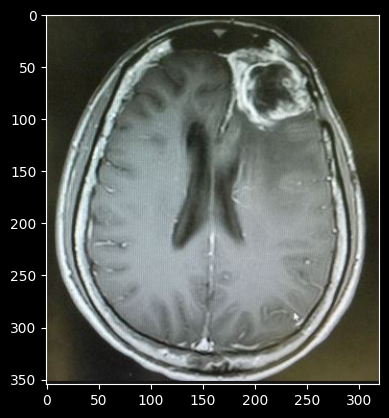

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ferna\OneDrive\Desktop\Brain_Tumor_Classification\brain_tumor_dataset\yes\Y47.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))